In [49]:
import os

from src import data_processing
import matplotlib.pyplot as plt
import zipfile
import bz2

In [7]:
%pwd

'/Users/william.devena/Desktop/UCL/RESEARCH PROJECT/RL-for-market-making-in-sports-trading'

In [37]:
#markets['1.208134612'][1672445979435]['marketDefinition']['runners']
def extract_runners_id(markets):
    #print(list(markets.keys())[0])
    
    id = list(markets.keys())[0]
    id2 = list(markets[id].keys())[0]
    
    #print(markets[id][id2]['marketDefinition']['runners'])
    runners = markets[id][id2]['marketDefinition']['runners']
    
    # for runner in runners:
    #     print(runner['id'])
    
    return [runner['id'] for runner in runners]

In [38]:
file_dir = "/Users/william.devena/Desktop/UCL/RESEARCH PROJECT/QST/Data/PRO/2023/Jan/1/31993571"
file_name = "31993571"
file_path = os.path.join(file_dir, file_name)

data = data_processing.parse_file(file_path=file_path)

markets = data_processing.parse_historical_data(data)

print(extract_runners_id(markets=markets))

[19608355, 8784969]


In [41]:
def read_data_from_file(file_path):
    data = data_processing.parse_file(file_path=file_path)
    markets = data_processing.parse_historical_data(data)

    runners = extract_runners_id(markets=markets)

    order_book_history = data_processing.get_order_book_history(runner_ids=runners,
                                                                max_load_limit=40000,
                                                                markets=markets)

    runner_id1 = runners[0]
    data_1, game_start_time1, game_end_time1 = data_processing.get_runner_data(runner_id=runner_id1, 
                                                                        order_book_history=order_book_history)

    runner_id2 = runners[1]
    data_2, game_start_time2, game_end_time2 = data_processing.get_runner_data(runner_id=runner_id2, 
                                                                       order_book_history=order_book_history)
    
    return data_1, data_2

In [55]:
def plot_data(data, path):
        cols = ["Volume",
                #"ATL Price",
                #"ATL Volume",
                #"ATB Price",
                #"ATB Volume",
                "Close",
                "Total Volume"]
        
        for col in cols:
                plt.plot(data[col])
                plt.title(col)
                plt.savefig(os.path.join(path, col))
                plt.close()

    

In [56]:
def read_data_and_plot(file_path, plot_path):
    data_1, data_2 = read_data_from_file(file_path=file_path)
    file_dir = file_path.split("/")[-2]
    file_name = file_path.split("/")[-1]
    path_plot_runner_1 = os.path.join(plot_path, file_dir, file_name, "runner_1")
    path_plot_runner_2 = os.path.join(plot_path, file_dir, file_name, "runner_2")
        
    if not os.path.exists(path_plot_runner_1):
        os.makedirs(path_plot_runner_1)
        
    if not os.path.exists(path_plot_runner_2):
        os.makedirs(path_plot_runner_2)
    
    plot_data(data=data_1, path=path_plot_runner_1)
    plot_data(data=data_2, path=path_plot_runner_2)

In [57]:
def read_dir_and_plot(data_dir, plot_path):
    #data_dir = "/Users/william.devena/Desktop/UCL/RESEARCH PROJECT/QST/Data/PRO/2023/Jan/1"
    for dir in os.listdir(data_dir):
        #print(dir)
        dir_path = os.path.join(data_dir, dir)
        files = os.listdir(dir_path)
        for file in files:
            #print(file)
            if ".bz2" in file:
                unzipped_file = file.replace(".bz2", "")
                zipped_path = os.path.join(dir_path, file)
                unzipped_path = os.path.join(dir_path, unzipped_file)
                if unzipped_file not in files:
                    with open(zipped_path, 'rb') as source, open(unzipped_path, 'wb') as dest:
                        dest.write(bz2.decompress(source.read()))
                    read_data_and_plot(file_path=unzipped_path,
                                       plot_path=plot_path)
            else:
                unzipped_path = os.path.join(dir_path, file)
                read_data_and_plot(file_path=unzipped_path,
                                   plot_path=plot_path)
    
                        

In [59]:
file_dir = "/Users/william.devena/Desktop/UCL/RESEARCH PROJECT/QST/Data/PRO2/2023/Jan/1"
read_dir_and_plot(data_dir=file_dir, plot_path="./plots2")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 23: invalid start byte

In [40]:
read_data_and_plot(file_path=file_path)

                         Volume ATL Price ATL Volume  \
2022-12-31 07:32:39.479    0.00        []         []   
2022-12-31 07:32:39.745    0.00        []         []   
2022-12-31 07:32:40.153    0.00        []         []   
2022-12-31 07:32:42.463    0.00        []         []   
2022-12-31 07:45:11.962    0.00        []         []   
...                         ...       ...        ...   
2023-01-01 23:37:08.776    0.78        []         []   
2023-01-01 23:37:25.645    0.78        []         []   
2023-01-01 23:37:57.156    0.00        []         []   
2023-01-01 23:37:58.439    0.00        []         []   
2023-01-01 23:37:59.365    0.00        []         []   

                                         ATB Price                 ATB Volume  \
2022-12-31 07:32:39.479                         []                         []   
2022-12-31 07:32:39.745                     [1.01]                       [15]   
2022-12-31 07:32:40.153                     [1.01]                       [17]   
202

In [9]:
data_dir = "/Users/william.devena/Desktop/UCL/RESEARCH PROJECT/QST/Data/PRO/2023/Jan/1"
for dir in os.listdir(data_dir):
    #print(dir)
    dir_path = os.path.join(data_dir, dir)
    files = os.listdir(dir_path)
    for file in files:
        #print(file)
        if ".bz2" in file:
            unzipped_file = file.replace(".bz2", "")
            
            if unzipped_file not in files:
                with zipfile.ZipFile(file,"r") as zip_ref:
                    zip_ref.extractall(".")
                    
                

1.208158383.bz2
1.208158381.bz2
1.208158386.bz2
1.208158389.bz2
31995925.bz2
1.208143288.bz2
31994892.bz2
1.208143283.bz2
1.208143281.bz2
1.208159822.bz2
1.208159788.bz2
1.208159789.bz2
31996164.bz2
1.208159790.bz2
1.208159785.bz2
1.208159791.bz2
1.208159787.bz2
1.208159792.bz2
1.208159786.bz2
1.208159794.bz2
1.208139783.bz2
1.208139769.bz2
1.208139780.bz2
1.208139790.bz2
1.208139786.bz2
1.208139832.bz2
1.208139774.bz2
1.208139777.bz2
1.208139798.bz2
1.208139771.bz2
31994496.bz2
31995379.bz2
1.208152594.bz2
1.208152608.bz2
1.208152605.bz2
1.208152601.bz2
31994436
.DS_Store
1.208138675.bz2
1.208138688.bz2
1.208138716.bz2
1.208138667.bz2
1.208138671.bz2
1.208138683.bz2
1.208138684.bz2
1.208138685.bz2
31994436.bz2
1.208138686.bz2
1.208138679.bz2
1.208158902.bz2
1.208158899.bz2
31995970.bz2
1.208158905.bz2
1.208158897.bz2
1.208159856.bz2
1.208159854.bz2
31996165.bz2
1.208159850.bz2
1.208159851.bz2
1.208159847.bz2
1.208159853.bz2
1.208159884.bz2
1.208159852.bz2
1.208159848.bz2
1.208159849.b

In [12]:
file_dir = "/Users/william.devena/Desktop/UCL/RESEARCH PROJECT/QST/Data/PRO/2023/Jan/1/31993571"
file_name = "31993571"
file_path = os.path.join(file_dir, file_name)

data = data_processing.parse_file(file_path=file_path)

markets = data_processing.parse_historical_data(data)

print(extract_runners_id(markets=markets))

runners = [4829328, 2497008]
#runner_id = runners[0]
#print(runner_id)
order_book_history = data_processing.get_order_book_history(runner_ids=runners,
                                                            max_load_limit=40000,
                                                            markets=markets)

runner_id1 = runners[0]
data1, game_start_time1, game_end_time1 = data_processing.get_runner_data(runner_id=runner_id1, 
                                                                       order_book_history=order_book_history)

runner_id2 = runners[1]
data2, game_start_time2, game_end_time2 = data_processing.get_runner_data(runner_id=runner_id2, 
                                                                       order_book_history=order_book_history)


TypeError: 'dict_items' object is not subscriptable

In [4]:
data1.index, data2.index

(DatetimeIndex(['2022-12-31 07:32:39.479000', '2022-12-31 07:32:39.745000',
                '2022-12-31 07:32:40.153000', '2022-12-31 07:32:42.463000',
                '2022-12-31 07:45:11.962000', '2022-12-31 08:31:18.766000',
                '2022-12-31 08:31:18.895000', '2022-12-31 11:20:19.701000',
                '2022-12-31 11:20:25.714000', '2022-12-31 11:20:38.905000',
                ...
                '2023-01-01 23:29:14.502000', '2023-01-01 23:31:45.590000',
                '2023-01-01 23:33:34.284000', '2023-01-01 23:35:22.271000',
                '2023-01-01 23:37:08.267000', '2023-01-01 23:37:08.776000',
                '2023-01-01 23:37:25.645000', '2023-01-01 23:37:57.156000',
                '2023-01-01 23:37:58.439000', '2023-01-01 23:37:59.365000'],
               dtype='datetime64[ns]', length=436, freq=None),
 DatetimeIndex(['2022-12-31 07:32:39.479000', '2022-12-31 07:32:39.745000',
                '2022-12-31 07:32:40.153000', '2022-12-31 07:32:42.463000',
    

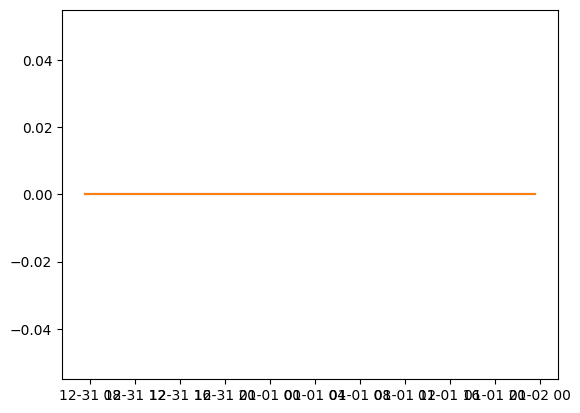

In [5]:
plt.plot(data1['Total Volume'])
plt.plot(data2['Total Volume'])

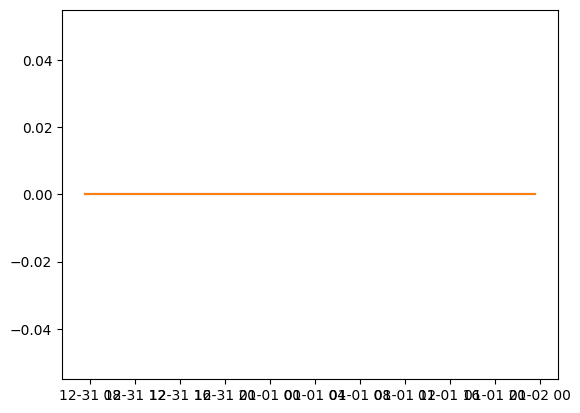

In [6]:
plt.plot(data1['Close'])
plt.plot(data2['Close'])

In [4]:
#data

In [49]:
#markets = data_processing.parse_historical_data(data)

In [50]:
#markets['1.208134612'].keys()

In [51]:
#markets['1.208134612'][1672445979435]['marketDefinition']['runners']